In [1]:
import json
import pandas as pd
import os

In [6]:
import pandas as pd
import os

try:
    BASE_DIR = os.path.dirname(__file__)
except NameError:
    BASE_DIR = os.getcwd()

csv_path = os.path.join(BASE_DIR, '..', 'kidney_disease.csv')
df = pd.read_csv(csv_path)


In [8]:
creds_path = os.path.join(BASE_DIR, '..','creds.json')
with open(creds_path) as f:
    connection_parameters = json.load(f)

In [9]:
#Load the data
df=pd.read_csv(csv_path)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [11]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


From the above data we can see that 'RC', 'WC' 'PCV' should be numeric datatype

In [12]:
#converting it into numeric
df['rc']=pd.to_numeric(df['rc'],errors='coerce')
df['wc']=pd.to_numeric(df['wc'],errors='coerce')
df['pcv']=pd.to_numeric(df['pcv'],errors='coerce')


In [13]:
df_numerical= df.select_dtypes(include=['int64','float64'])
df_categorical=df.select_dtypes(include=['object'])

In [14]:
df_numerical.isna().sum()

id        0
age       9
bp       12
sg       47
al       46
su       49
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wc      106
rc      131
dtype: int64

Filling the missing values with mean could be a good idea

In [15]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer=SimpleImputer(missing_values = np.nan,strategy='mean')
df_numerical=pd.DataFrame(imputer.fit_transform(df_numerical),columns=df_numerical.columns)

In [16]:
df_numerical

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000
396,396.0,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000
397,397.0,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000
398,398.0,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000


Checking the null values again, No NULL values found!

In [17]:
df_numerical.isna().sum()

id      0
age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

PREPROCESSING of the categorical columns

In [18]:
# Fill missing values with a new category 'Unknown'
categorical_col_names=df_categorical.columns
df_categorical[categorical_col_names] = df[categorical_col_names].fillna('Unknown')

#removing leading and trailing white spaces
df_categorical = df_categorical.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [19]:
categorical_col_names

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [20]:
#converting categorical values into numerical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = ['rbc', 'pc', 'pcc', 'ba']

for col in categorical_cols:
    df_categorical[col] = label_encoder.fit_transform(df_categorical[col])

#converting the below column values into binary, would be a good idea (as only 2 values are possible)
binary_mapping = {'yes': 1, 'no': 0, 'good': 1, 'poor': 0, 'ckd': 1, 'notckd': 0,'Unknown':-1}
df_categorical.replace(binary_mapping, inplace=True)


print(df_categorical)


     rbc  pc  pcc  ba  htn  dm  cad  appet  pe  ane  classification
0      0   2    1   1    1   1    0      1   0    0               1
1      0   2    1   1    0   0    0      1   0    0               1
2      2   2    1   1    0   1    0      0   0    1               1
3      2   1    2   1    1   0    0      0   1    1               1
4      2   2    1   1    0   0    0      1   0    0               1
..   ...  ..  ...  ..  ...  ..  ...    ...  ..  ...             ...
395    2   2    1   1    0   0    0      1   0    0               0
396    2   2    1   1    0   0    0      1   0    0               0
397    2   2    1   1    0   0    0      1   0    0               0
398    2   2    1   1    0   0    0      1   0    0               0
399    2   2    1   1    0   0    0      1   0    0               0

[400 rows x 11 columns]


In [21]:
#checking null values again
df_categorical.isna().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [22]:
df_numerical.columns


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')

Checking the distributions of all

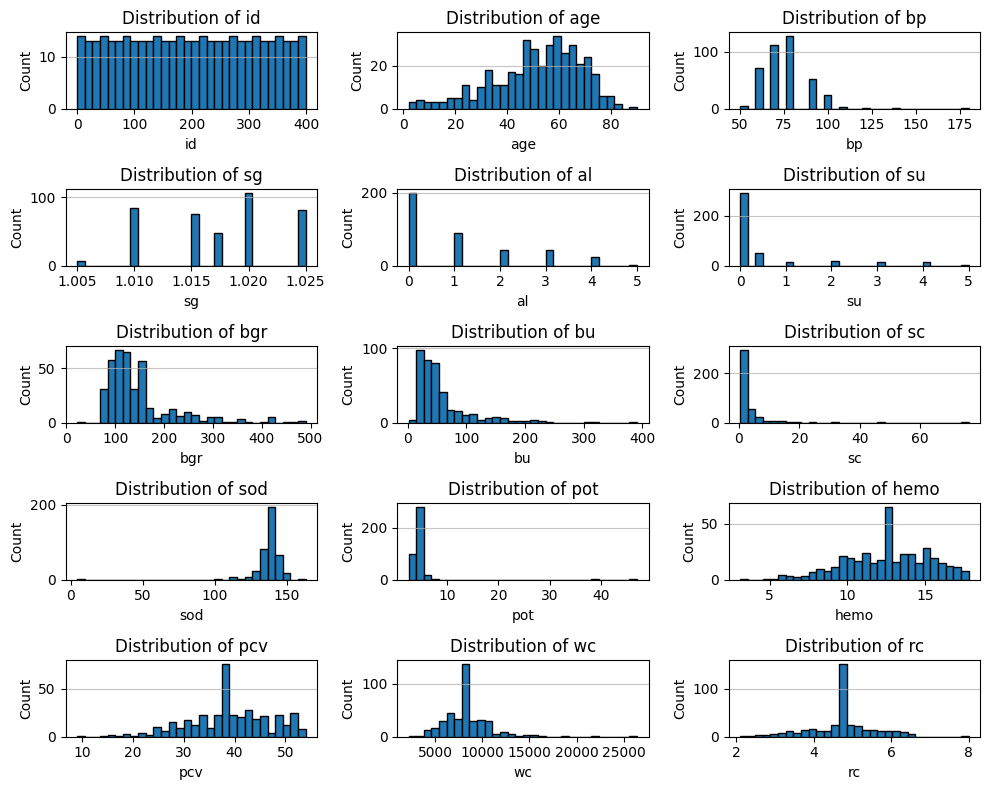

In [25]:
#Now we want to view the distibutions of ecah attribute and our label
import matplotlib.pyplot as plt

columns = df_numerical.columns

#create a grid for each plot
fig, axes = plt.subplots(len(columns)//3, 3, figsize=(10, 8))
axes = axes.flatten()

#plot the histogram distribution of each attribute and the label
for i, column in enumerate(columns):
    axes[i].hist(df_numerical[column], bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

Distributions of the below attributes look skewed, applying long transformation would be helpful.

In [26]:
df_numerical['bgr']=np.log1p(df_numerical['bgr'])
df_numerical['bu']=np.log1p(df_numerical['bu'])
df_numerical['sc']=np.log1p(df_numerical['sc'])
df_numerical['bp']=np.log1p(df_numerical['bp'])
df_numerical['wc']=np.log1p(df_numerical['wc'])
df_numerical['pcv']=np.log1p(df_numerical['pcv'])

In [27]:
#removing the outliers
from scipy.stats.mstats import winsorize
def remove_outliers(df):
  df_updated=winsorize(df,limits=[0.05,0.05])
  return df_updated

In [28]:
df_numerical['sod']=remove_outliers(df_numerical['sod'])
df_numerical['pot']=remove_outliers(df_numerical['pot'])

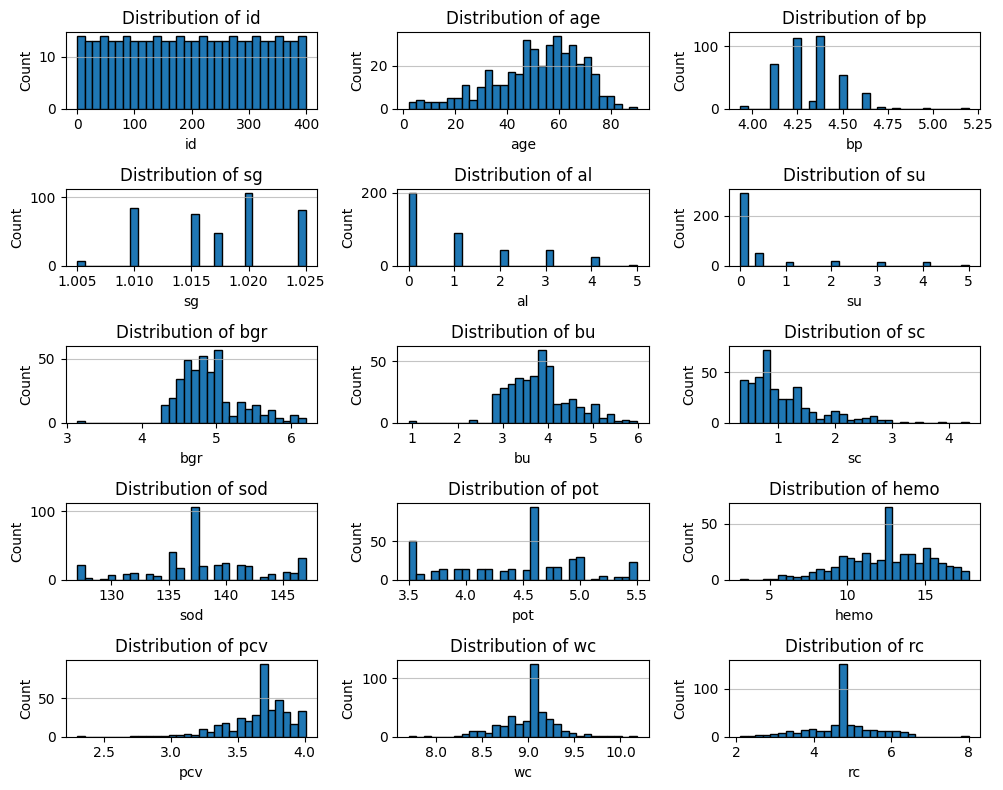

In [29]:
import matplotlib.pyplot as plt

columns = df_numerical.columns

#create a grid for each plot
fig, axes = plt.subplots(len(columns)//3, 3, figsize=(10, 8))
axes = axes.flatten()

#plot the histogram distribution of each attribute and the label
for i, column in enumerate(columns):
    axes[i].hist(df_numerical[column], bins=30, edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

The distributions look better this time. Normally distributed in most cases.

In [30]:
df_new=pd.concat([df_numerical,df_categorical],axis=1)

In [31]:
df_new.tail()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
395,395.0,55.0,4.394449,1.020,0.0,0.0,4.948760,3.912023,0.405465,147.0,...,2,1,1,0,0,0,1,0,0,0
396,396.0,42.0,4.262680,1.025,0.0,0.0,4.330733,3.465736,0.788457,141.0,...,2,1,1,0,0,0,1,0,0,0
397,397.0,12.0,4.394449,1.020,0.0,0.0,4.615121,3.295837,0.470004,137.0,...,2,1,1,0,0,0,1,0,0,0
398,398.0,17.0,4.110874,1.025,0.0,0.0,4.744932,3.931826,0.693147,135.0,...,2,1,1,0,0,0,1,0,0,0
399,399.0,58.0,4.394449,1.025,0.0,0.0,4.882802,2.944439,0.741937,141.0,...,2,1,1,0,0,0,1,0,0,0


In [32]:
df_new.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

Checking the class distributions below:




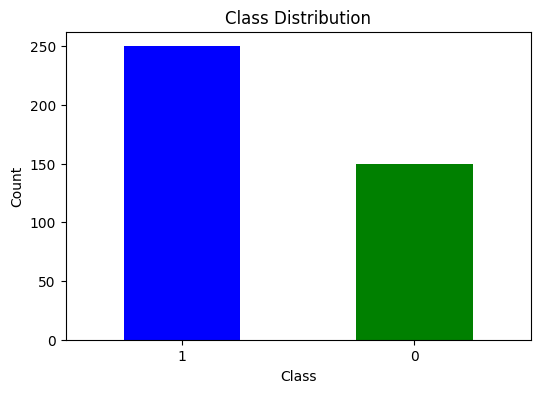

In [33]:
import matplotlib.pyplot as plt

class_counts = df_new['classification'].value_counts()

plt.figure(figsize=(6,4))
class_counts.plot(kind='bar',color=['blue','green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()

We can observed that there is class imbalance present, for this project we are not handling this. But approches like downsampling, upsampling, SMORTE can be helpful in dealing with class imbalance datasets.

In [35]:
import seaborn as sns

heatmap to check the correlation

<Axes: >

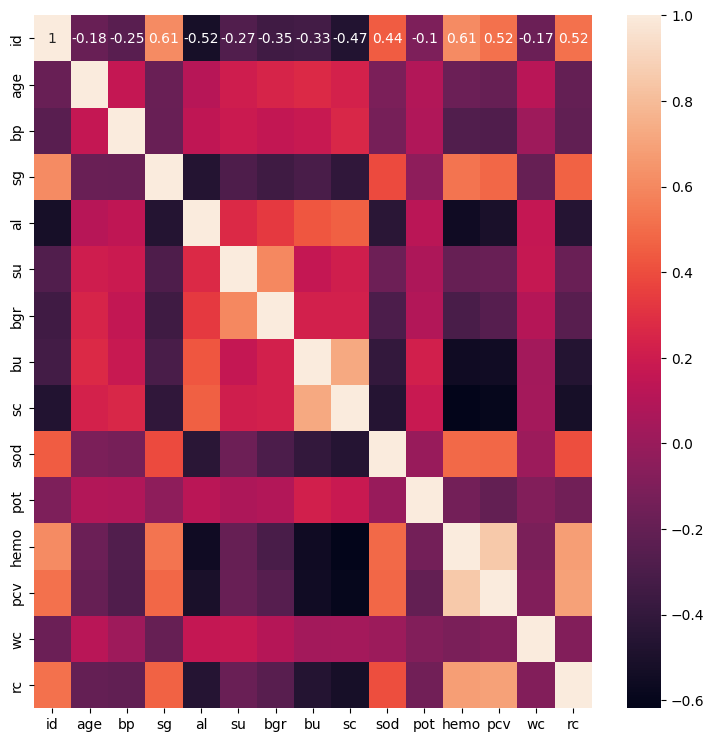

In [36]:
matrix = df_numerical.corr(method='pearson')
# relation=matrix['Classification']
plt.figure(figsize=(9,9))
sns.heatmap(matrix, annot = True)

In [37]:
df_new=df_new.drop('id',axis=1)

Converting the dataset and maintaining the class distribution.

In [38]:
from sklearn.model_selection import train_test_split
# Split the DataFrame
train_df, test_df = train_test_split(df_new, test_size=0.2, stratify=df_new['classification'],random_state=42)

# train_df contains 80% of the data
# test_df contains 20% of the data

print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Training set shape: (320, 25)
Test set shape: (80, 25)


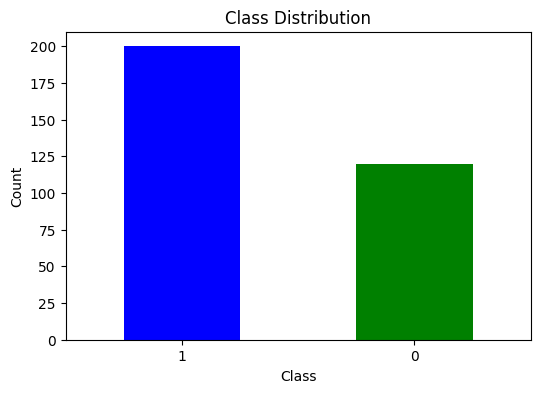

In [39]:
#distribution of train df
import matplotlib.pyplot as plt

class_counts = train_df['classification'].value_counts()

plt.figure(figsize=(6,4))
class_counts.plot(kind='bar',color=['blue','green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()

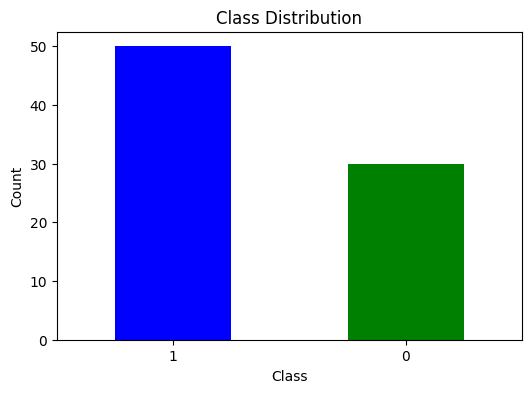

In [40]:
#distribution of test df
import matplotlib.pyplot as plt

class_counts = test_df['classification'].value_counts()

plt.figure(figsize=(6,4))
class_counts.plot(kind='bar',color=['blue','green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)
plt.show()

In [41]:

# Save train and test files
train_df.to_csv(os.path.join(BASE_DIR, 'kidney_disease_train.csv'), index=False)
test_df.to_csv(os.path.join(BASE_DIR, 'kidney_disease_test.csv'), index=False)
